<a href="https://colab.research.google.com/github/Eloi-Le-Renard/KAGGLE-1/blob/main/Project%205/POLIST_01_notebookanalyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse exploratoire des clients d'Olist 

Segmentation des clients d' "Olist" (site de vente en ligne) sur la période 2016-09-04 / 2018-10-17.

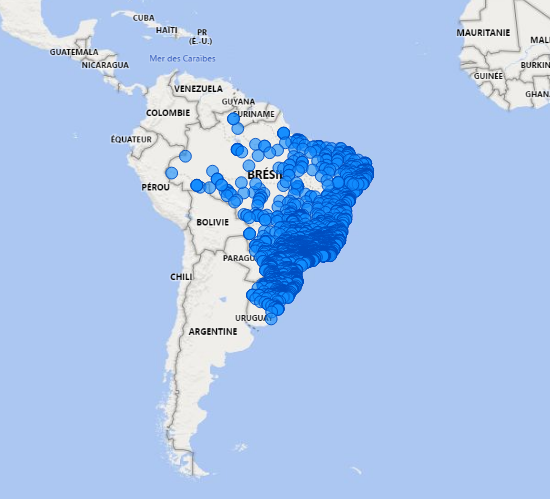


**Remarque:** Localisation des achats des clients

## Import

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
# to use google drive files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
review_df = pd.read_csv('/content/drive/MyDrive/JUJUPYTER/OpenClassrooms projects/P5/data/olist_order_reviews_dataset.csv')
customers_df = pd.read_csv('/content/drive/MyDrive/JUJUPYTER/OpenClassrooms projects/P5/data/olist_customers_dataset.csv')
items_df = pd.read_csv('/content/drive/MyDrive/JUJUPYTER/OpenClassrooms projects/P5/data/olist_order_items_dataset.csv')
payments_df = pd.read_csv('/content/drive/MyDrive/JUJUPYTER/OpenClassrooms projects/P5/data/olist_order_payments_dataset.csv')
orders_df = pd.read_csv('/content/drive/MyDrive/JUJUPYTER/OpenClassrooms projects/P5/data/olist_orders_dataset.csv')
products_df = pd.read_csv('/content/drive/MyDrive/JUJUPYTER/OpenClassrooms projects/P5/data/olist_products_dataset.csv')
sellers_df = pd.read_csv('/content/drive/MyDrive/JUJUPYTER/OpenClassrooms projects/P5/data/olist_sellers_dataset.csv')
categories_df = pd.read_csv('/content/drive/MyDrive/JUJUPYTER/OpenClassrooms projects/P5/data/product_category_name_translation.csv')

In [ ]:
import seaborn as sns
def plot_NaN(data, limite = 0, name='Nombre de \"NaN\" par variable'):
    """
    limite = display col with at least "limite" number of NaN
    """
    nb_nan = data.isna().sum()
    if sum(nb_nan.values) == 0:
      if limite != 0: print("NO NaN, limit set to 0")
      limite = 0
    # pour voir les colonnes avec "nb NaN > limite"
    nb_nan = nb_nan[nb_nan.values >= limite]
    d = {'Variables': nb_nan.index, 'Number of NaN': nb_nan.values} 
    nb_nan_df = pd.DataFrame(data=d)
    plt.figure(figsize=(18, 8))
    nb_nan_df1 = nb_nan_df

    sns.set_theme(style="whitegrid")
    ax = sns.barplot(x="Variables", y="Number of NaN", data=nb_nan_df1)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    ax.set_title(name, fontdict= { 'fontsize': 24, 'fontweight':'bold'})

## Fichiers individuels

Pour la segmentation, on s'interesse aux fichiers ci-dessous.

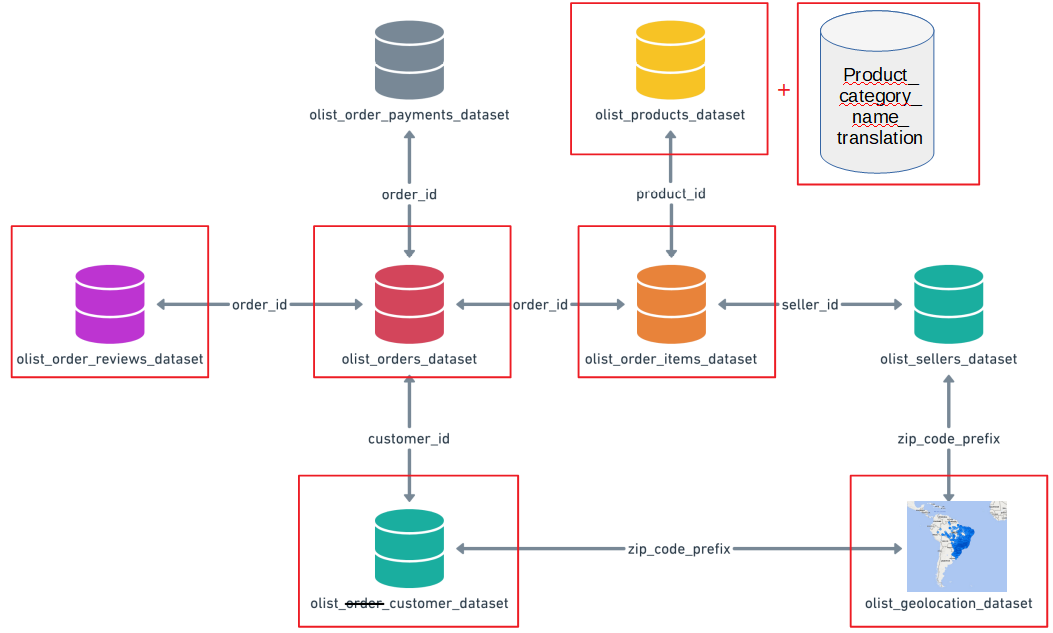

In [ ]:
all_data = [review_df,customers_df,items_df,payments_df,orders_df,products_df,sellers_df,categories_df]
all_data_labels = ["review_df","customers_df","items_df","payments_df","orders_df","products_df","sellers_df","categories_df"]

### Description

In [ ]:
i = -1
for df in all_data:
  i += 1
  print("=========================")
  print(all_data_labels[i])
  print("=========================")
  nbr_row = df.shape[0]
  nbr_col = df.shape[1]
  print("nombre d'individus : "+ str(nbr_row))
  print("nombre de variables : "+ str(nbr_col))
  data_numerical = df.select_dtypes(include=np.number)
  data_categorical = df.select_dtypes(exclude=np.number)
  print("Dont " + str(data_numerical.shape[1]) + " numeriques")
  print("Dont " + str(data_categorical.shape[1]) + " categoriques")

review_df
nombre d'individus : 100000
nombre de variables : 7
Dont 1 numeriques
Dont 6 categoriques
customers_df
nombre d'individus : 99441
nombre de variables : 5
Dont 1 numeriques
Dont 4 categoriques
items_df
nombre d'individus : 112650
nombre de variables : 7
Dont 3 numeriques
Dont 4 categoriques
payments_df
nombre d'individus : 103886
nombre de variables : 5
Dont 3 numeriques
Dont 2 categoriques
orders_df
nombre d'individus : 99441
nombre de variables : 8
Dont 0 numeriques
Dont 8 categoriques
products_df
nombre d'individus : 32951
nombre de variables : 9
Dont 7 numeriques
Dont 2 categoriques
sellers_df
nombre d'individus : 3095
nombre de variables : 4
Dont 1 numeriques
Dont 3 categoriques
categories_df
nombre d'individus : 71
nombre de variables : 2
Dont 0 numeriques
Dont 2 categoriques


**Remarque:** On a environs 100 000 clients et achat.

#### Détails +

In [ ]:
i = -1
for df in all_data:
  i += 1
  print("=========================")
  print(all_data_labels[i])
  print("=========================")
  display(df.describe(include='all'))

review_df


review_id  ... review_answer_timestamp
count                             100000  ...                  100000
unique                             99173  ...                   99010
top     ddc52555ca27b0fe67d5255147682d2d  ...     2017-06-15 23:21:05
freq                                   3  ...                       4
mean                                 NaN  ...                     NaN
std                                  NaN  ...                     NaN
min                                  NaN  ...                     NaN
25%                                  NaN  ...                     NaN
50%                                  NaN  ...                     NaN
75%                                  NaN  ...                     NaN
max                                  NaN  ...                     NaN

[11 rows x 7 columns]

customers_df


customer_id  ... customer_state
count                              99441  ...          99441
unique                             99441  ...             27
top     966e44ef089263460cc572f28187ee86  ...             SP
freq                                   1  ...          41746
mean                                 NaN  ...            NaN
std                                  NaN  ...            NaN
min                                  NaN  ...            NaN
25%                                  NaN  ...            NaN
50%                                  NaN  ...            NaN
75%                                  NaN  ...            NaN
max                                  NaN  ...            NaN

[11 rows x 5 columns]

items_df


order_id  ...  freight_value
count                             112650  ...  112650.000000
unique                             98666  ...            NaN
top     8272b63d03f5f79c56e9e4120aec44ef  ...            NaN
freq                                  21  ...            NaN
mean                                 NaN  ...      19.990320
std                                  NaN  ...      15.806405
min                                  NaN  ...       0.000000
25%                                  NaN  ...      13.080000
50%                                  NaN  ...      16.260000
75%                                  NaN  ...      21.150000
max                                  NaN  ...     409.680000

[11 rows x 7 columns]

payments_df


order_id  ...  payment_value
count                             103886  ...  103886.000000
unique                             99440  ...            NaN
top     fa65dad1b0e818e3ccc5cb0e39231352  ...            NaN
freq                                  29  ...            NaN
mean                                 NaN  ...     154.100380
std                                  NaN  ...     217.494064
min                                  NaN  ...       0.000000
25%                                  NaN  ...      56.790000
50%                                  NaN  ...     100.000000
75%                                  NaN  ...     171.837500
max                                  NaN  ...   13664.080000

[11 rows x 5 columns]

orders_df


order_id  ... order_estimated_delivery_date
count                              99441  ...                         99441
unique                             99441  ...                           459
top     47607b002b56d0c23e24d91a519b0856  ...           2017-12-20 00:00:00
freq                                   1  ...                           522

[4 rows x 8 columns]

products_df


product_id  ... product_width_cm
count                              32951  ...     32949.000000
unique                             32951  ...              NaN
top     1ef4d09abc3b209cfc14875996252306  ...              NaN
freq                                   1  ...              NaN
mean                                 NaN  ...        23.196728
std                                  NaN  ...        12.079047
min                                  NaN  ...         6.000000
25%                                  NaN  ...        15.000000
50%                                  NaN  ...        20.000000
75%                                  NaN  ...        30.000000
max                                  NaN  ...       118.000000

[11 rows x 9 columns]

sellers_df


seller_id  ...  seller_state
count                               3095  ...          3095
unique                              3095  ...            23
top     5ab05b6d86d417796c69ffd6774ec832  ...            SP
freq                                   1  ...          1849
mean                                 NaN  ...           NaN
std                                  NaN  ...           NaN
min                                  NaN  ...           NaN
25%                                  NaN  ...           NaN
50%                                  NaN  ...           NaN
75%                                  NaN  ...           NaN
max                                  NaN  ...           NaN

[11 rows x 4 columns]

categories_df


product_category_name product_category_name_english
count                     71                            71
unique                    71                            71
top                   flores               furniture_decor
freq                       1                             1

### Données manquantes

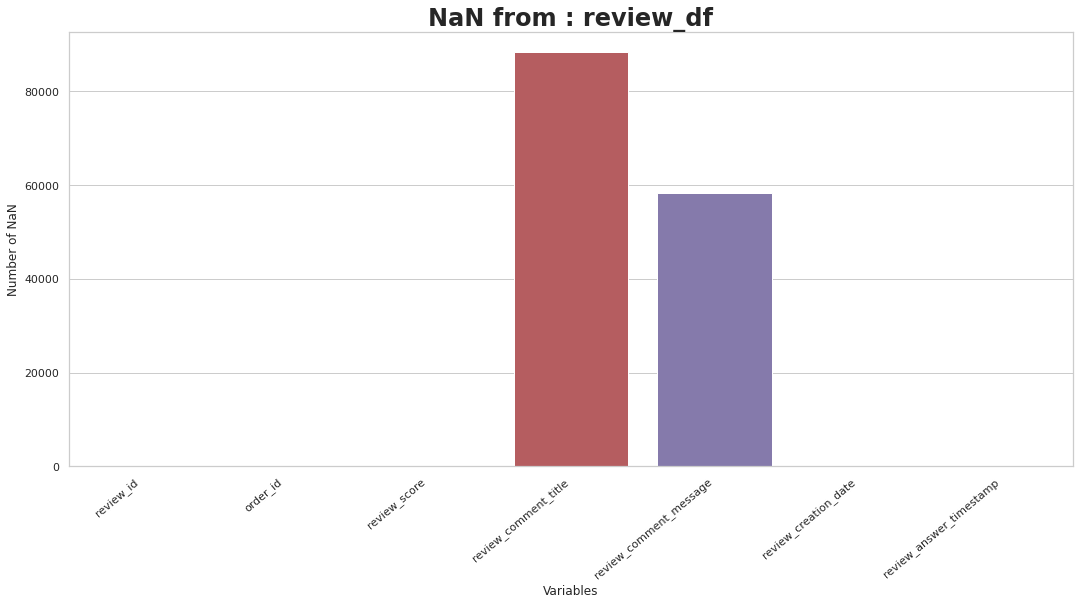

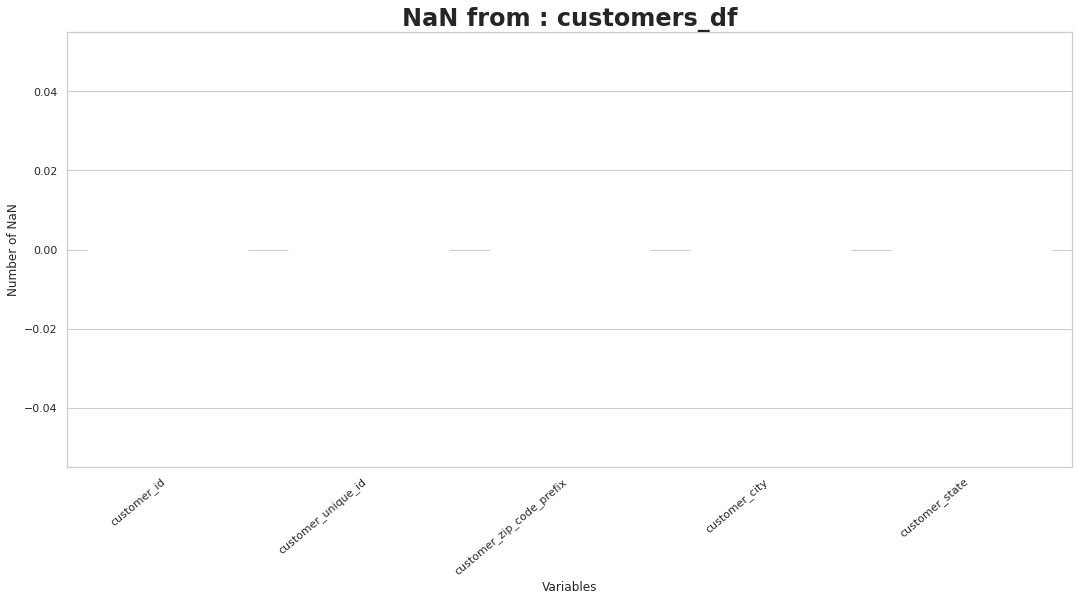

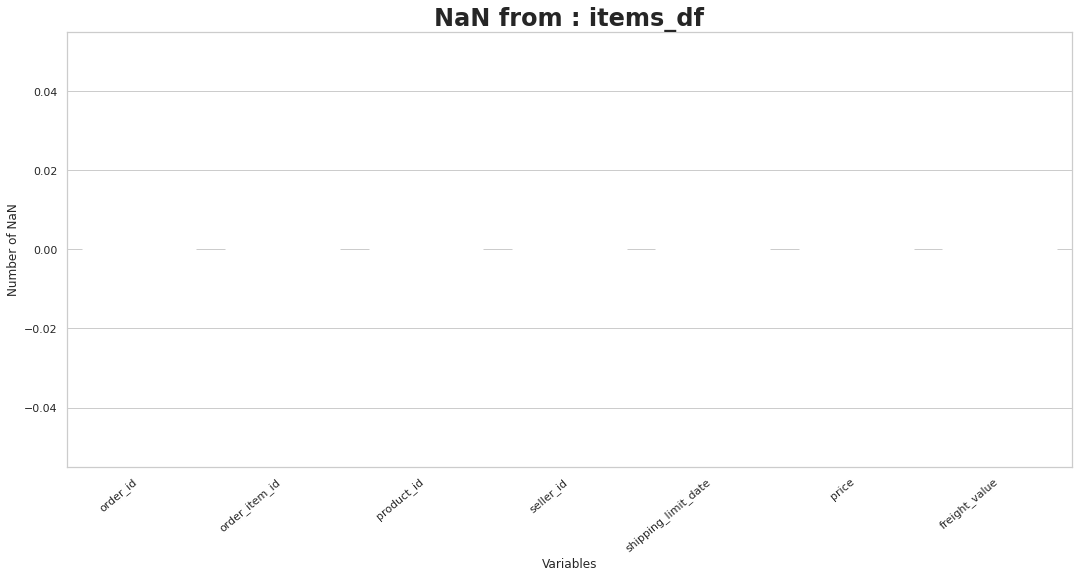

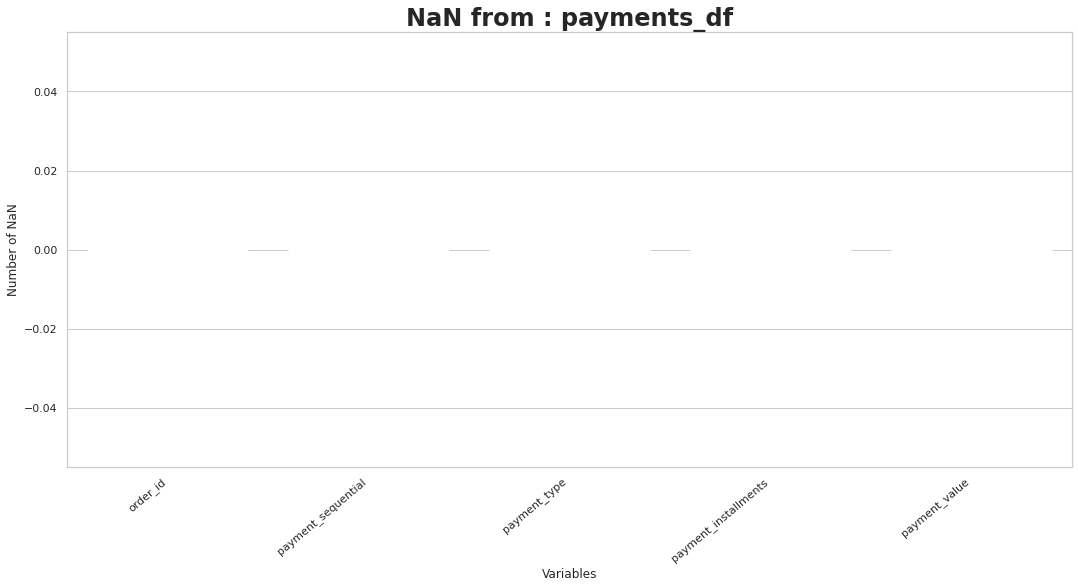

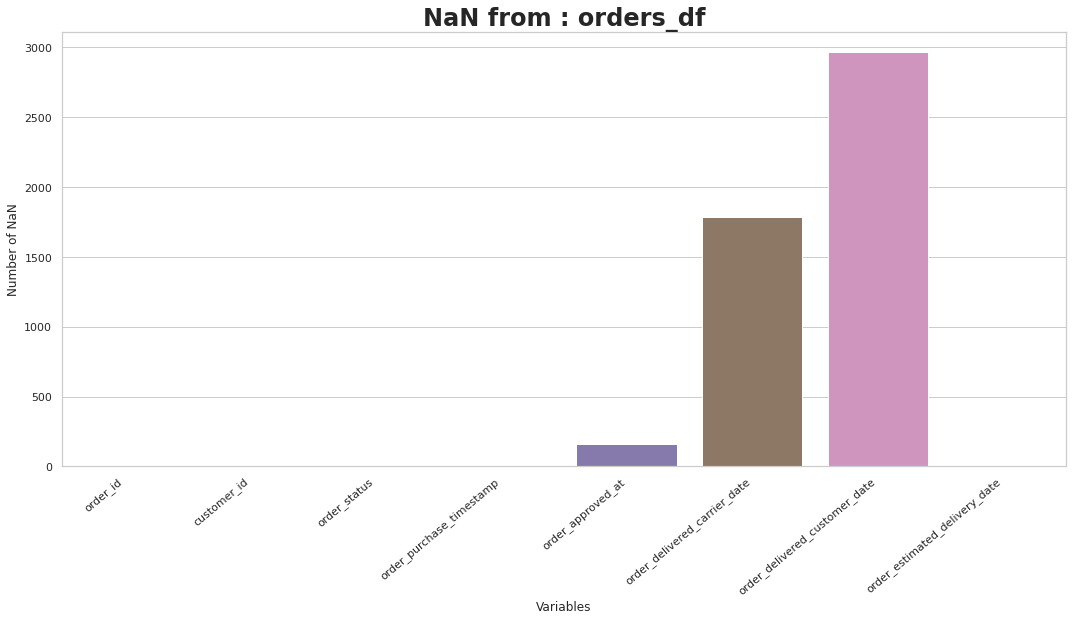

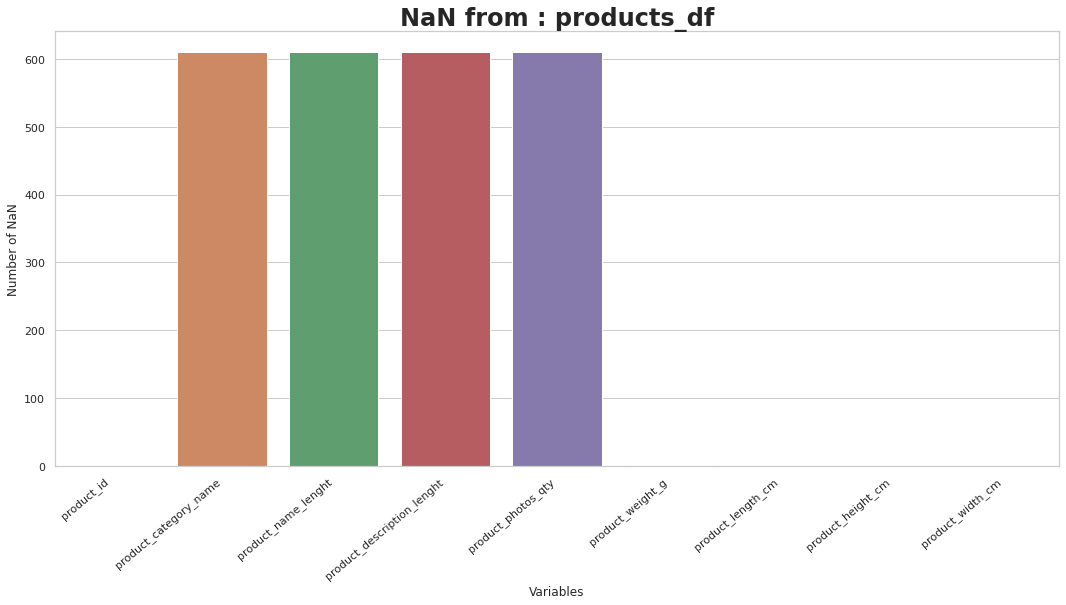

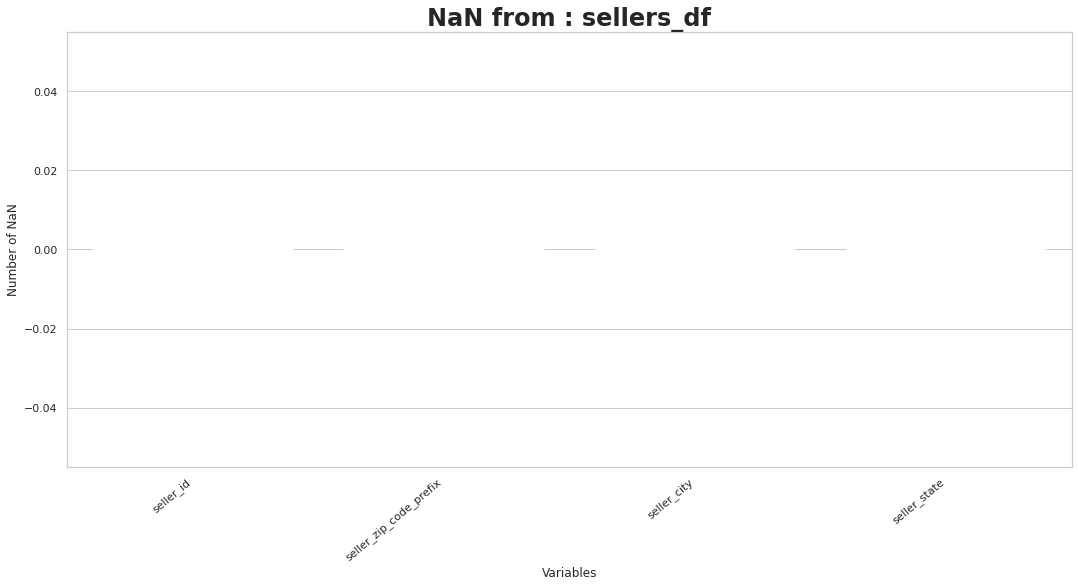

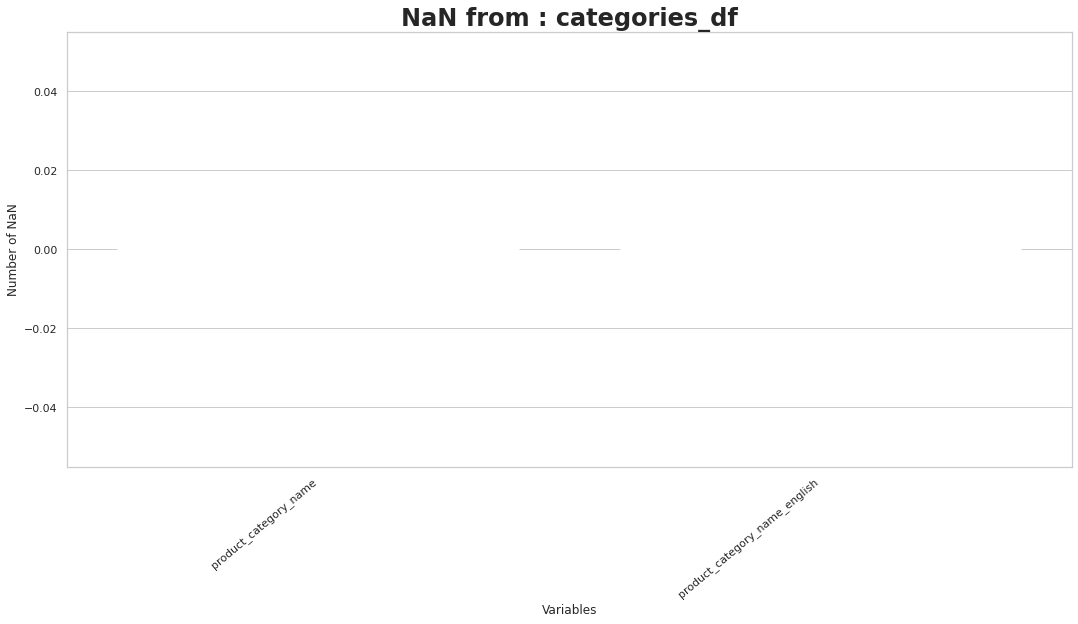

In [ ]:
i = -1
for df in all_data:
  i += 1
  plot_NaN(df, name="NaN from : "+all_data_labels[i])

**Remarque:** Plusieurs fichiers ne contiennent **aucune valeur manquante**.

#### Détails +

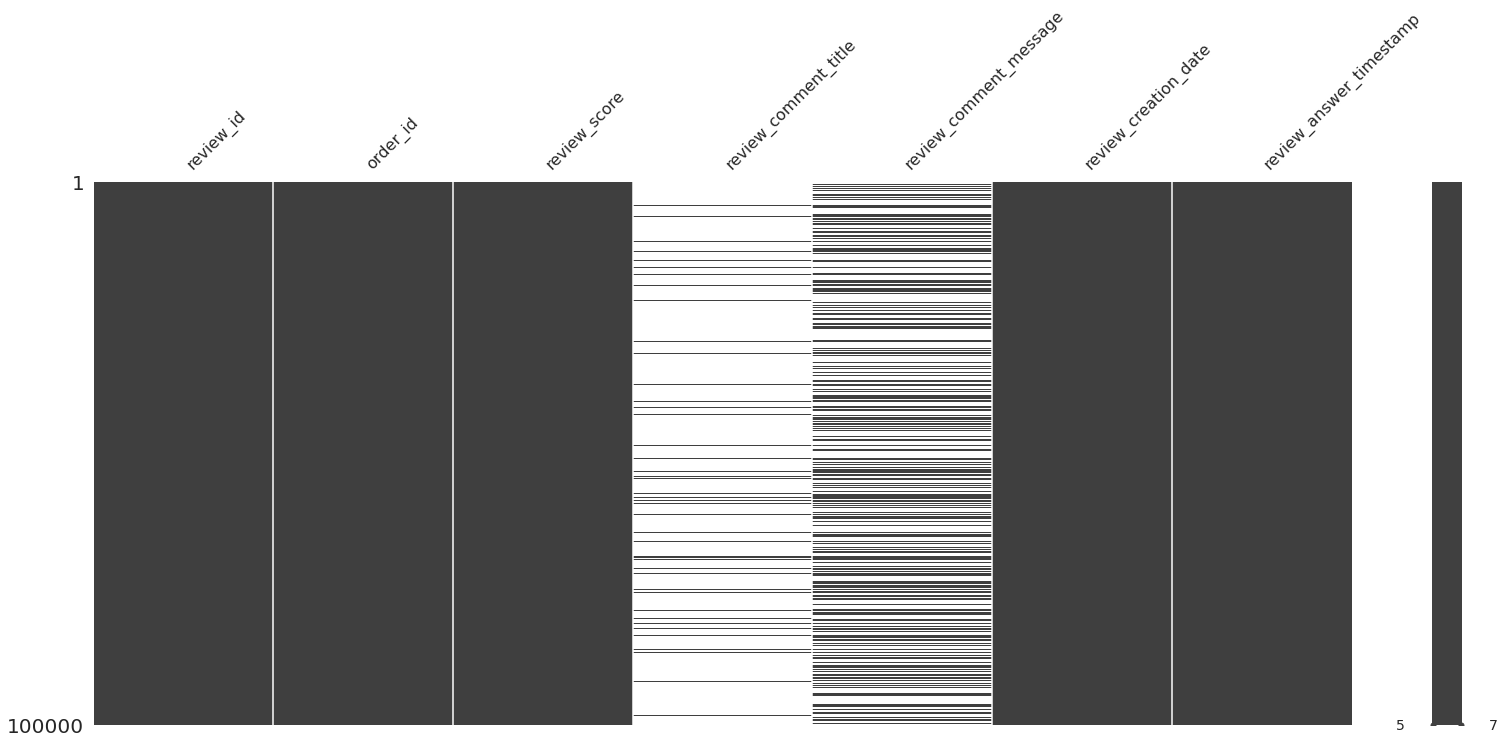

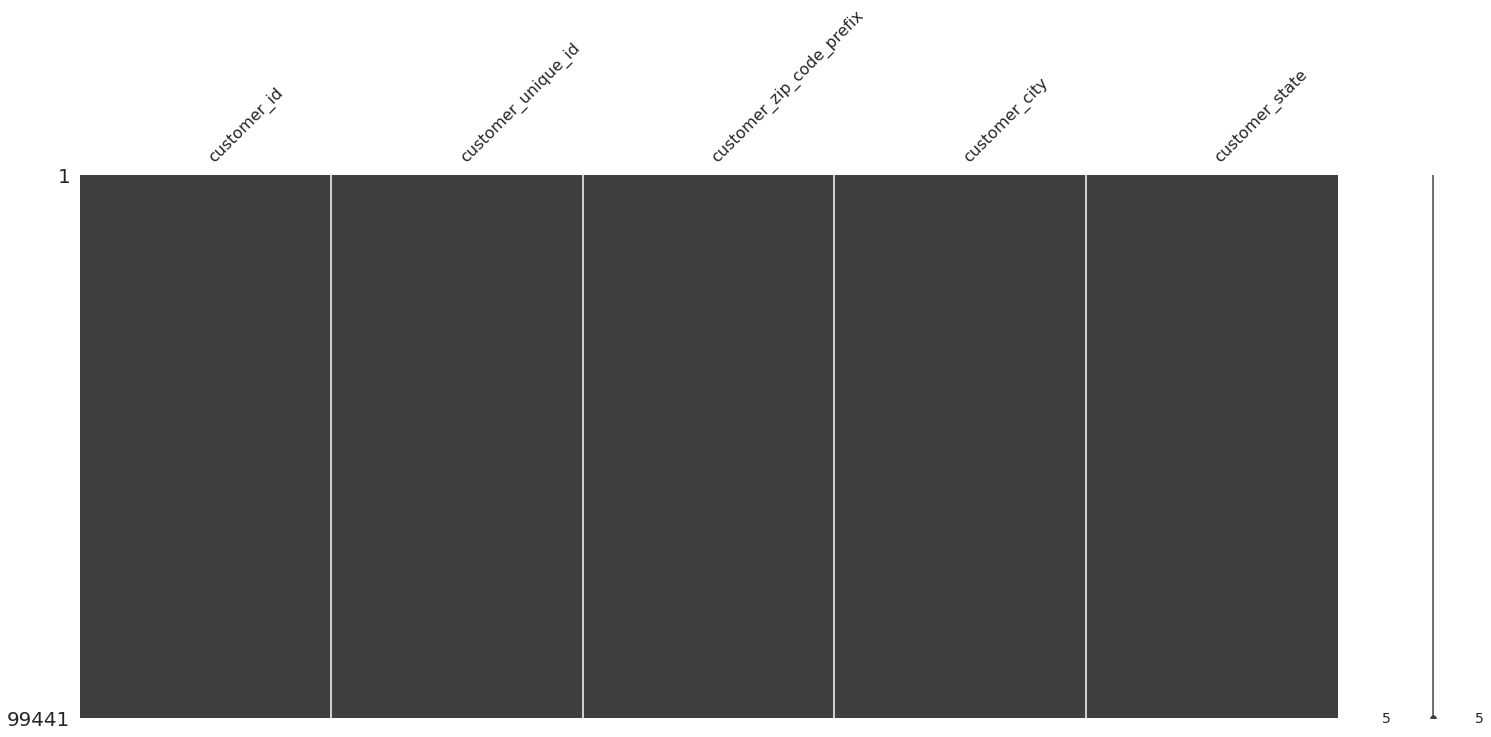

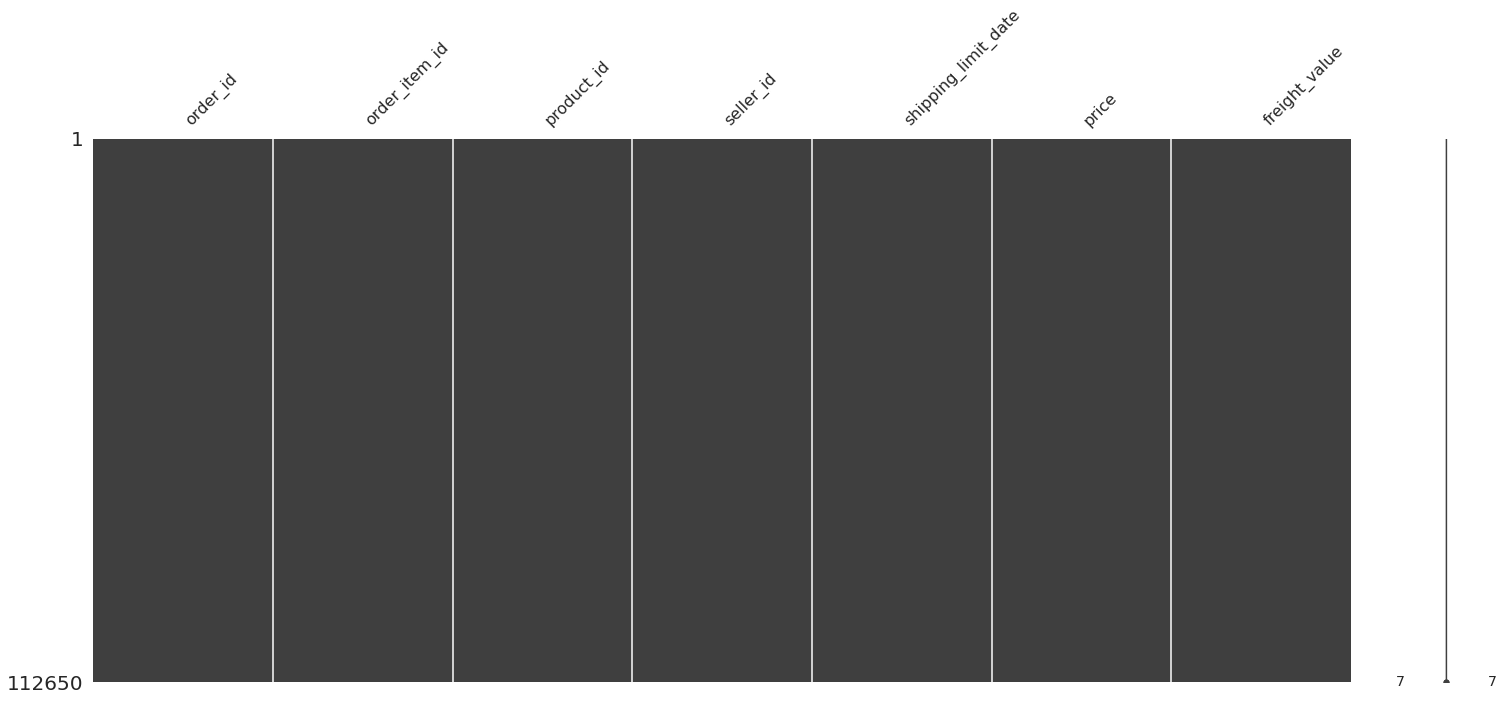

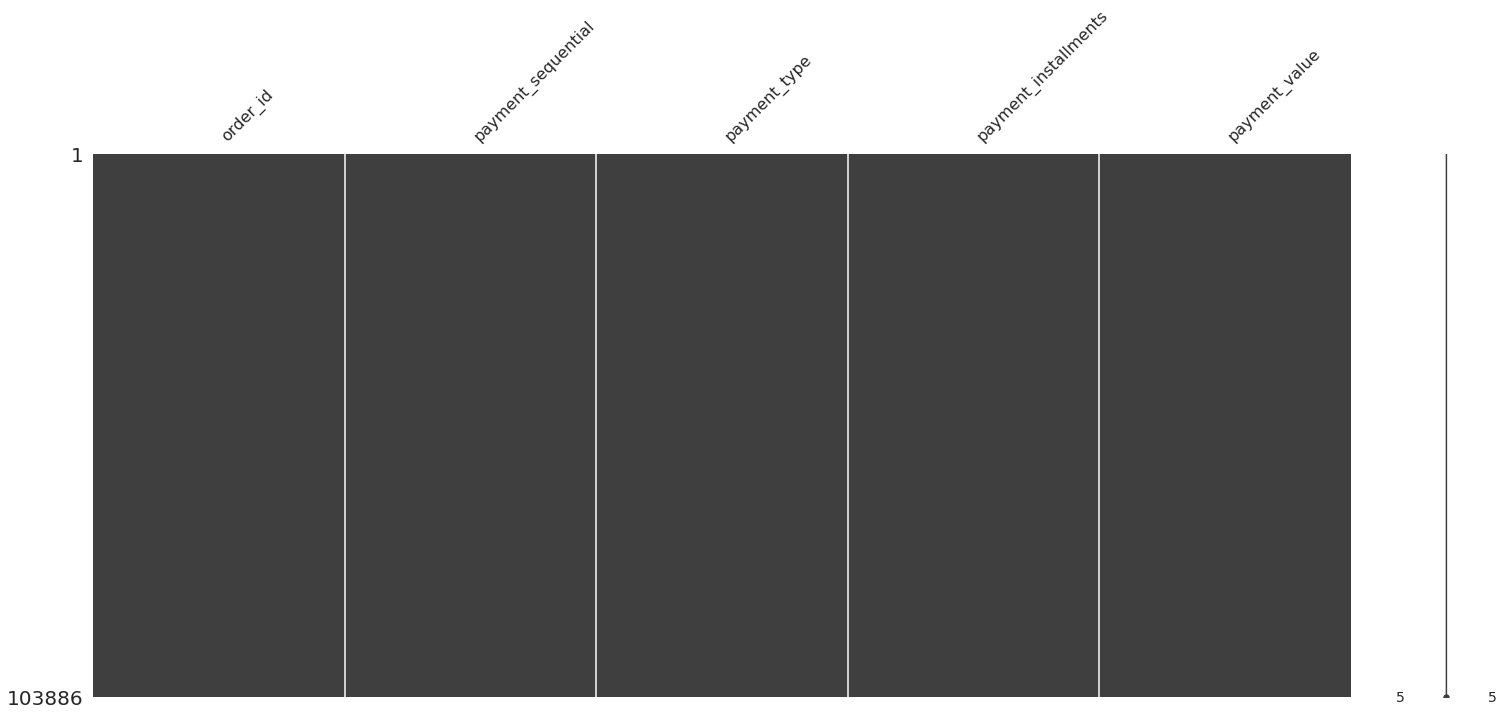

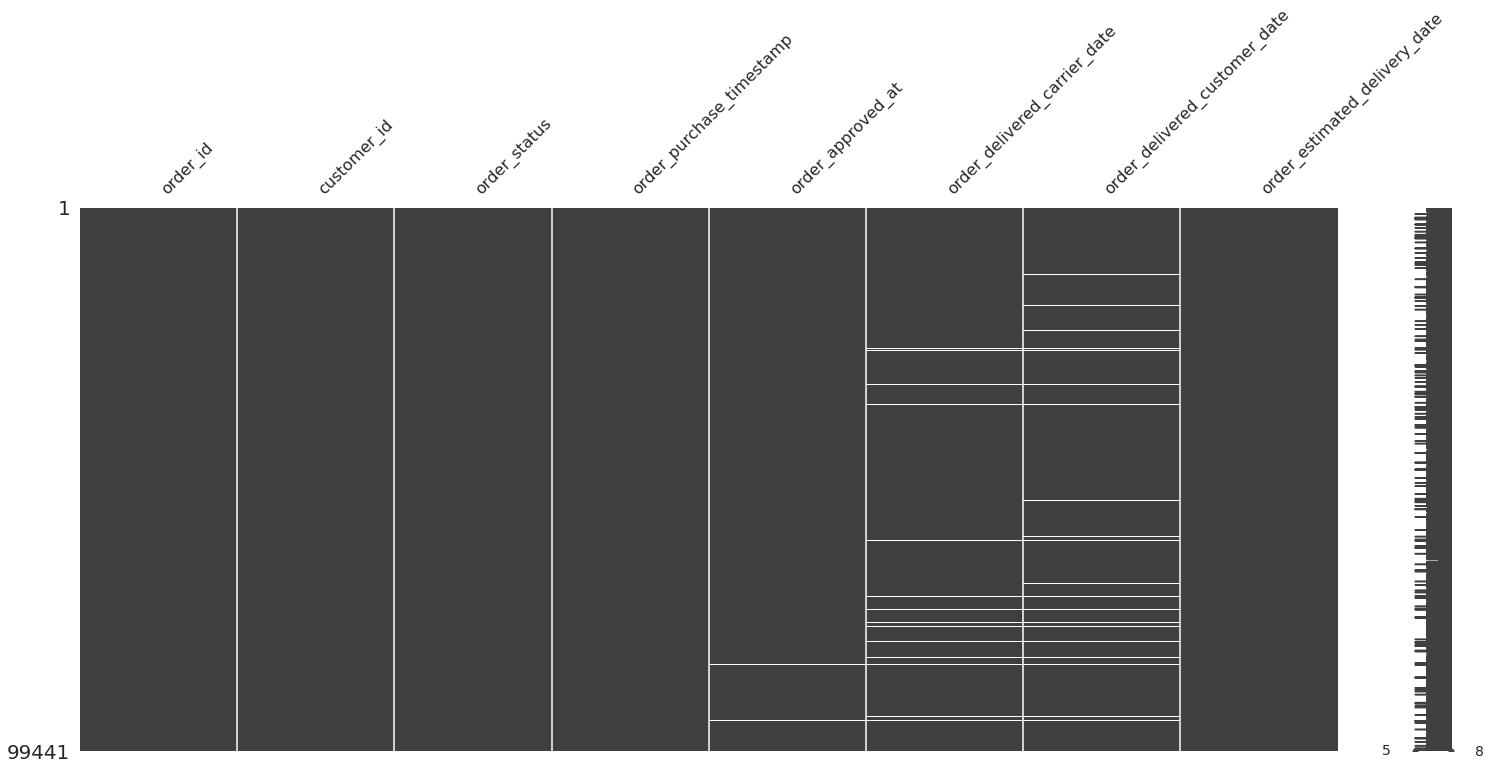

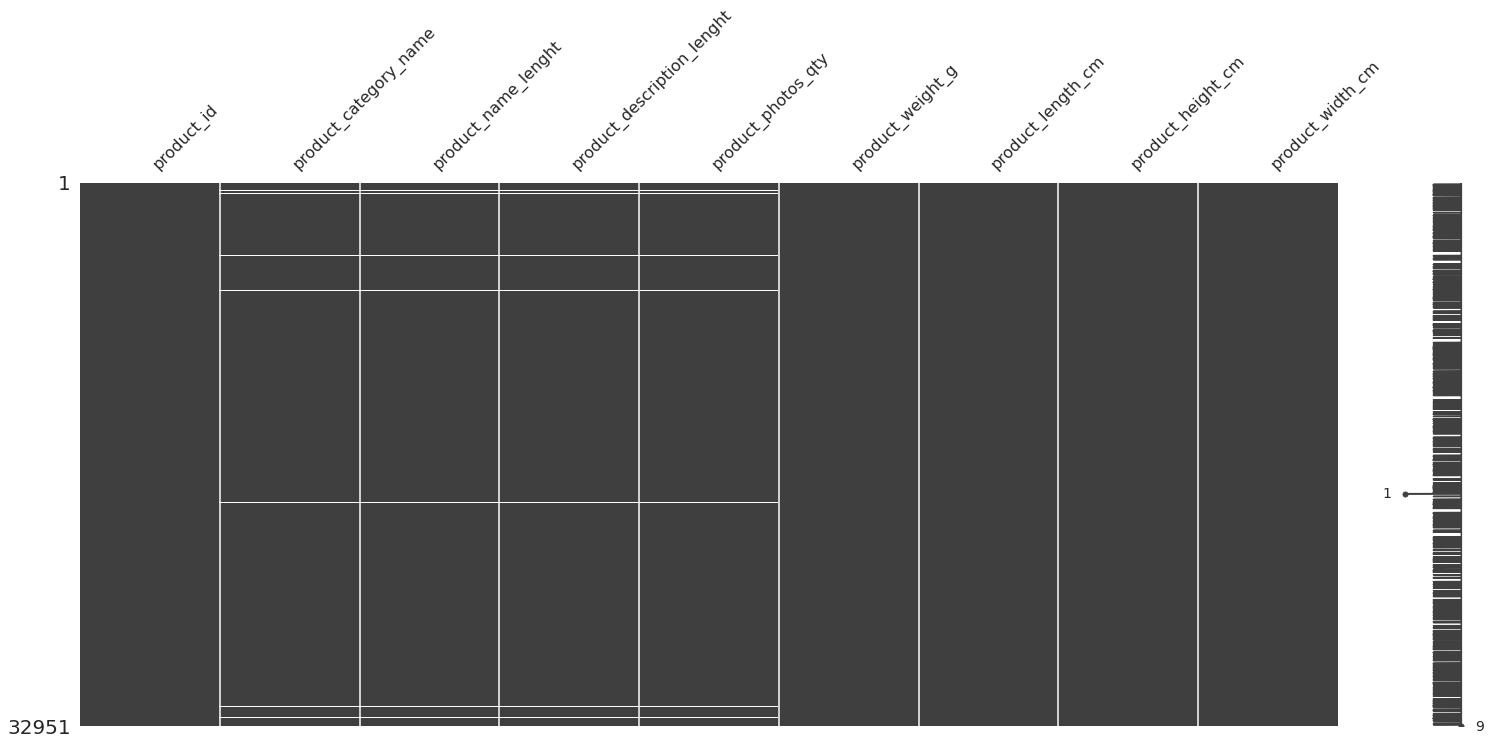

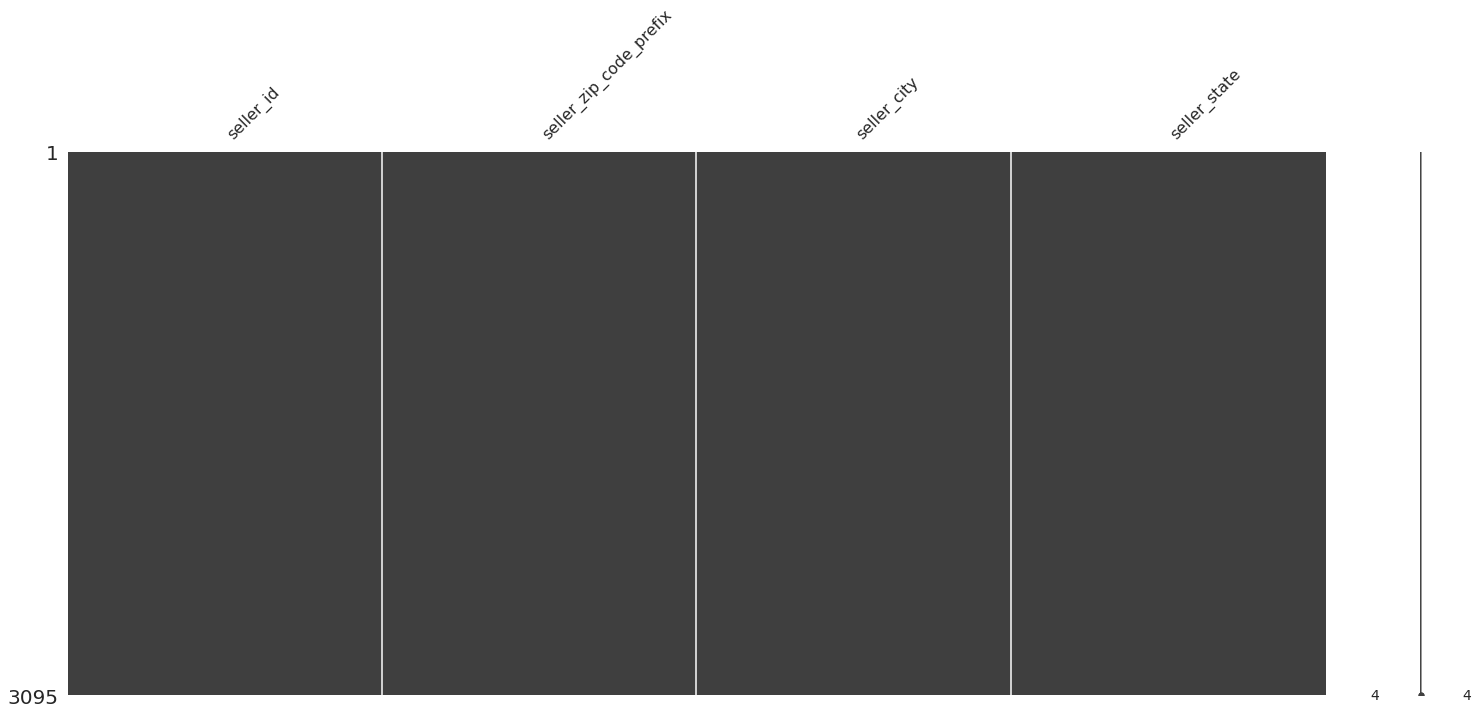

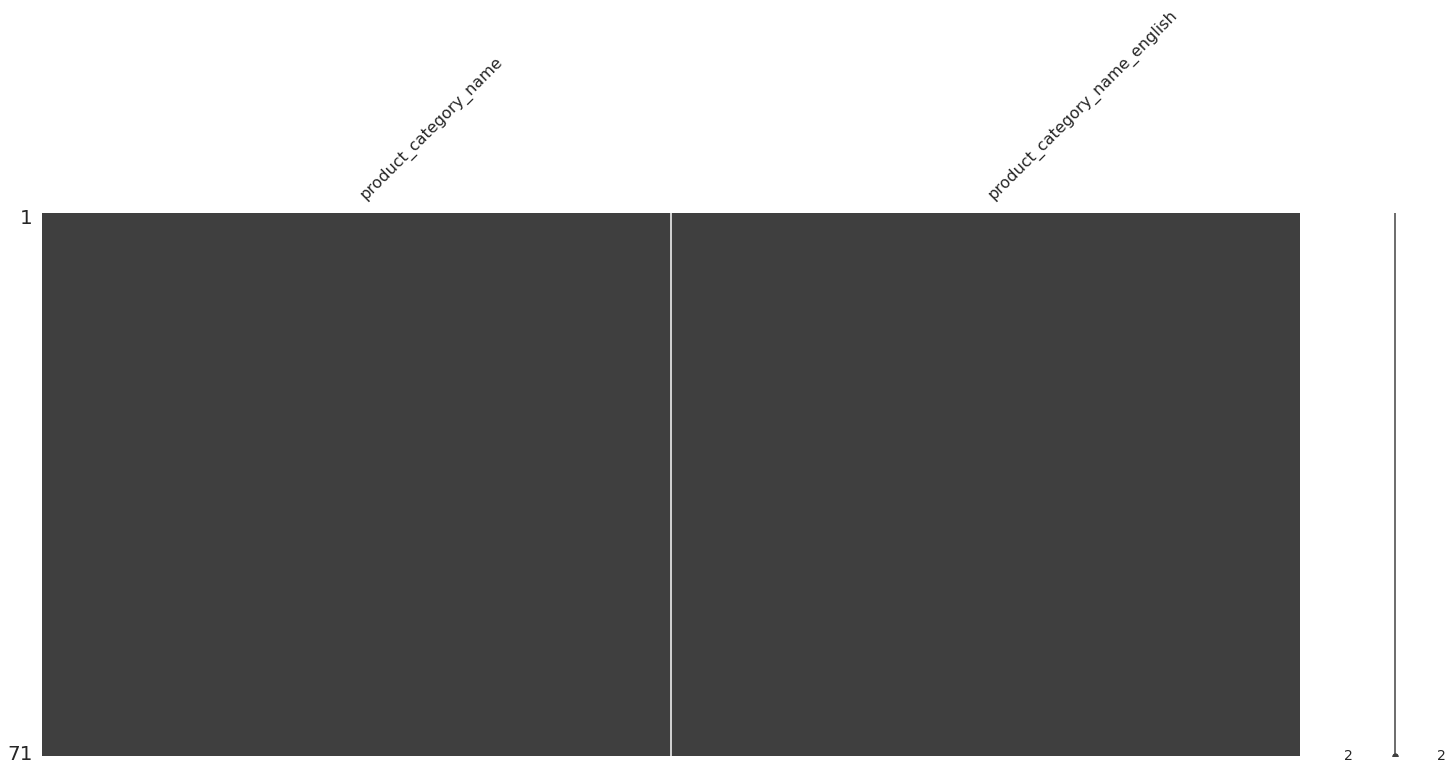

In [ ]:
i = -1
for df in all_data:
  i += 1
  msno.matrix(df)

### analyse univarié

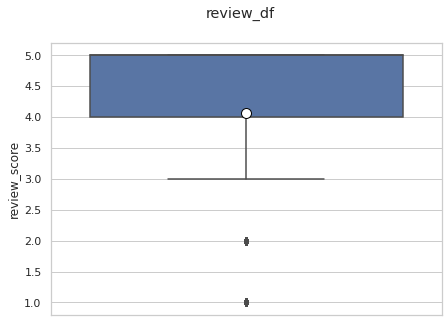

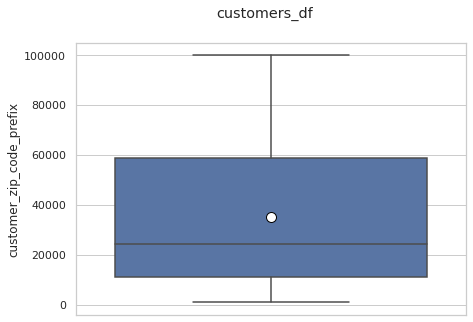

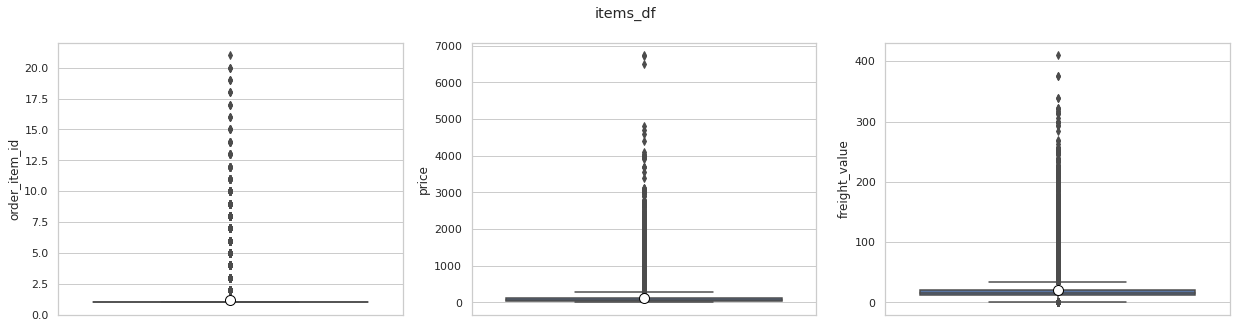

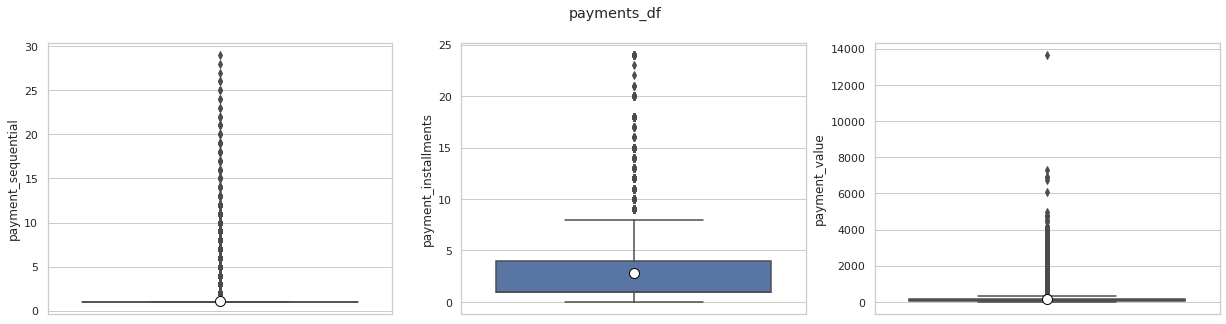

no numeric data for: orders_df


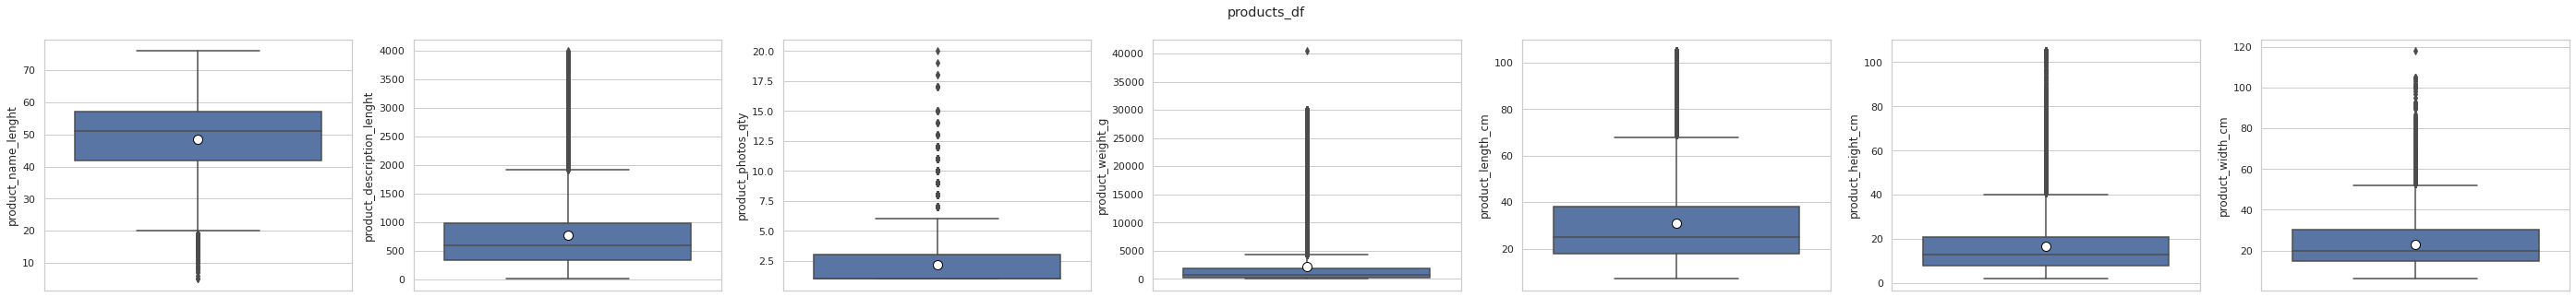

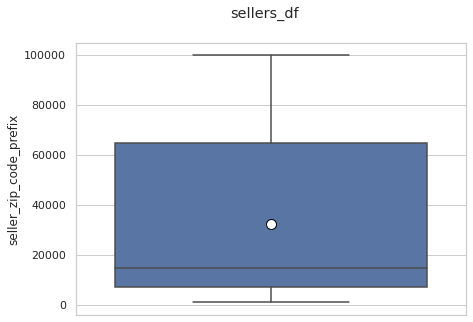

no numeric data for: categories_df


In [ ]:
i = -1
for df in all_data:
  i += 1
  
  data_numerical = df.select_dtypes(include=np.number)

  cols = data_numerical.columns
  if len(cols) == 0: print("no numeric data for: "+all_data_labels[i])
  else:
    fig = plt.figure(figsize=(7*len(cols), 5))
    fig.suptitle(all_data_labels[i])
    numPlot = 0
    for col in cols:
      numPlot += 1
      ax = fig.add_subplot(1, len(cols), numPlot)
      ax = sns.boxplot(y=col, data=data_numerical, showmeans=True,
                  meanprops={"marker":"o",
                        "markerfacecolor":"white", 
                        "markeredgecolor":"black",
                        "markersize":"10"})
    
  plt.show()

**Remarque:** la grande majorité des **clients sont satisfait** de leurs achats (entre 4/5 et 5/5).\
 Très rare sont ceux qui note en dessous de 3/5.

### analyse bivarié

review_df


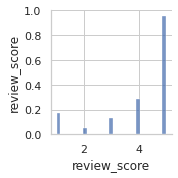

customers_df


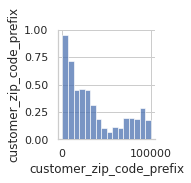

items_df


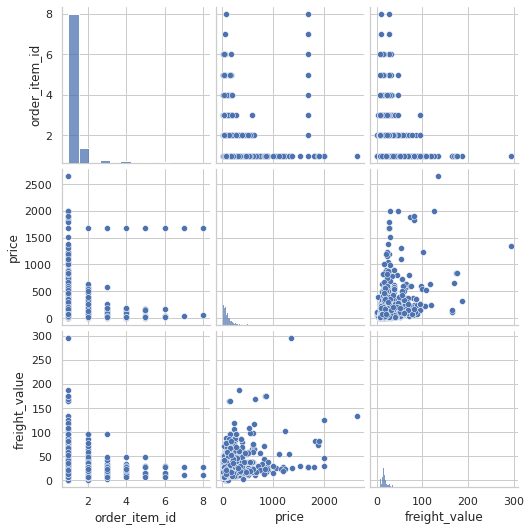

payments_df


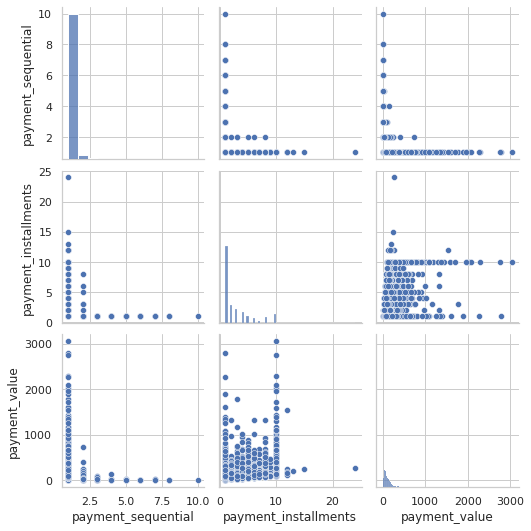

orders_df
products_df


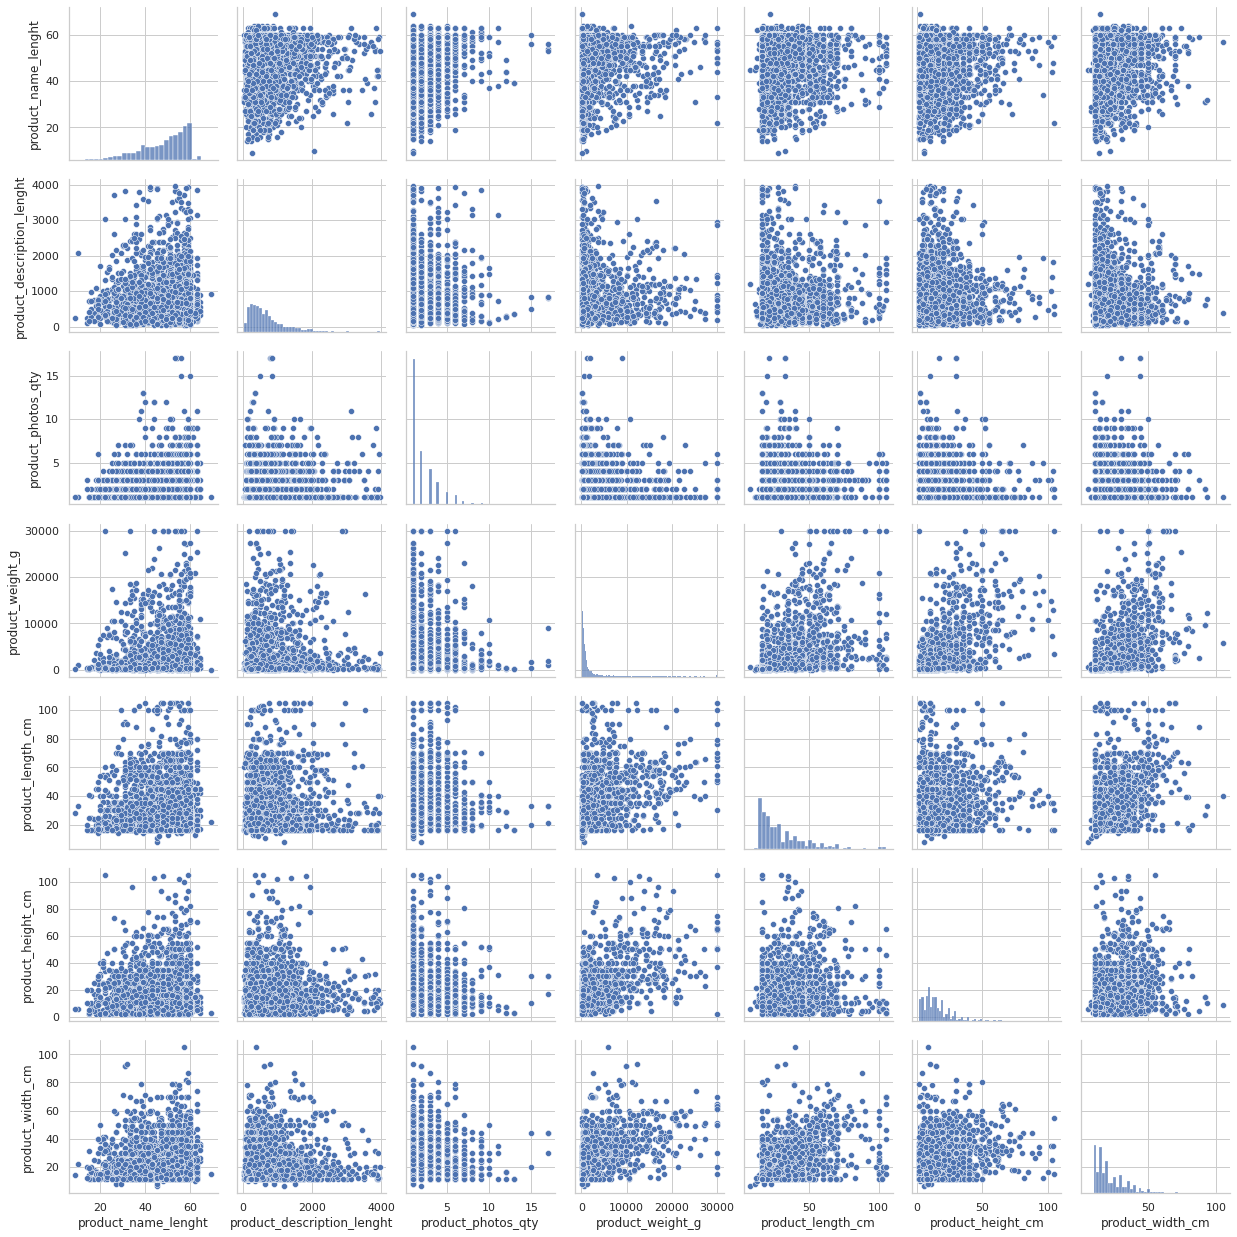

sellers_df


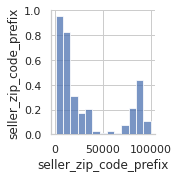

categories_df


In [ ]:
i = -1
for df in all_data:
  i += 1
  print("=========================")
  print(all_data_labels[i])
  print("=========================")
  data_numerical = df.select_dtypes(include=np.number)
  if data_numerical.shape[1] != 0: sns.pairplot(data_numerical[0:3000])
  plt.show()

**Remarque:** Aucune corrélation claire n'est identifiable entre chaque paire de variable.

## Fichiers fusionnés

### Fusion

On utilise le fichier de traduction pour decrire la **categorie des produits en anglais**

In [ ]:
data_merge = pd.merge(products_df, categories_df, on='product_category_name')
data_merge.head(3)

product_id  ... product_category_name_english
0  1e9e8ef04dbcff4541ed26657ea517e5  ...                     perfumery
1  6a2fb4dd53d2cdb88e0432f1284a004c  ...                     perfumery
2  0d009643171aee696f4733340bc2fdd0  ...                     perfumery

[3 rows x 10 columns]

In [ ]:
data_merge = pd.merge(items_df, data_merge, on='product_id')
data_merge.head(3)

order_id  ...  product_category_name_english
0  00010242fe8c5a6d1ba2dd792cb16214  ...                     cool_stuff
1  130898c0987d1801452a8ed92a670612  ...                     cool_stuff
2  532ed5e14e24ae1f0d735b91524b98b9  ...                     cool_stuff

[3 rows x 16 columns]

In [ ]:
data_merge = pd.merge(orders_df, data_merge, on='order_id')
data_merge.head(3)

order_id  ... product_category_name_english
0  e481f51cbdc54678b7cc49136f2d6af7  ...                    housewares
1  53cdb2fc8bc7dce0b6741e2150273451  ...                     perfumery
2  47770eb9100c2d0c44946d9cf07ec65d  ...                          auto

[3 rows x 23 columns]

In [ ]:
data_merge = pd.merge(customers_df, data_merge, on='customer_id')
data_merge.head(3)

customer_id  ... product_category_name_english
0  06b8999e2fba1a1fbc88172c00ba8bc7  ...              office_furniture
1  18955e83d337fd6b2def6b18a428ac77  ...                    housewares
2  4e7b3e00288586ebd08712fdd0374a03  ...              office_furniture

[3 rows x 27 columns]

In [ ]:
data_merge = pd.merge(review_df, data_merge, on='order_id')
data_merge.head(3)

review_id  ... product_category_name_english
0  7bc2406110b926393aa56f80a40eba40  ...                sports_leisure
1  7bc2406110b926393aa56f80a40eba40  ...                sports_leisure
2  80e641a11e56f04c1ad469d5645fdfde  ...         computers_accessories

[3 rows x 33 columns]

### Description

In [ ]:
nbr_row = data_merge.shape[0]
nbr_col = data_merge.shape[1]
print("nombre d'individus : "+ str(nbr_row))
print("nombre de variables : "+ str(nbr_col))
data_numerical = data_merge.select_dtypes(include=np.number)
data_categorical = data_merge.select_dtypes(exclude=np.number)
print("Dont " + str(data_numerical.shape[1]) + " numeriques")
print("Dont " + str(data_categorical.shape[1]) + " categoriques")

nombre d'individus : 111686
nombre de variables : 33
Dont 12 numeriques
Dont 21 categoriques


**Remarque:** Les individus correspondent aux achats des clients.

#### Détails +

In [ ]:
display(data_merge.describe(include='all'))

review_id  ... product_category_name_english
count                             111686  ...                        111686
unique                             97054  ...                            71
top     e8236fe7b6e1bdd513a500de361e2b87  ...                bed_bath_table
freq                                  21  ...                         11272
mean                                 NaN  ...                           NaN
std                                  NaN  ...                           NaN
min                                  NaN  ...                           NaN
25%                                  NaN  ...                           NaN
50%                                  NaN  ...                           NaN
75%                                  NaN  ...                           NaN
max                                  NaN  ...                           NaN

[11 rows x 33 columns]

**Remarque:** La categorie d'achat la plus populaire est "**bed_bath_table**".\
La ville qui contient le plus de client est "**sao paulo**"

### Données manquantes

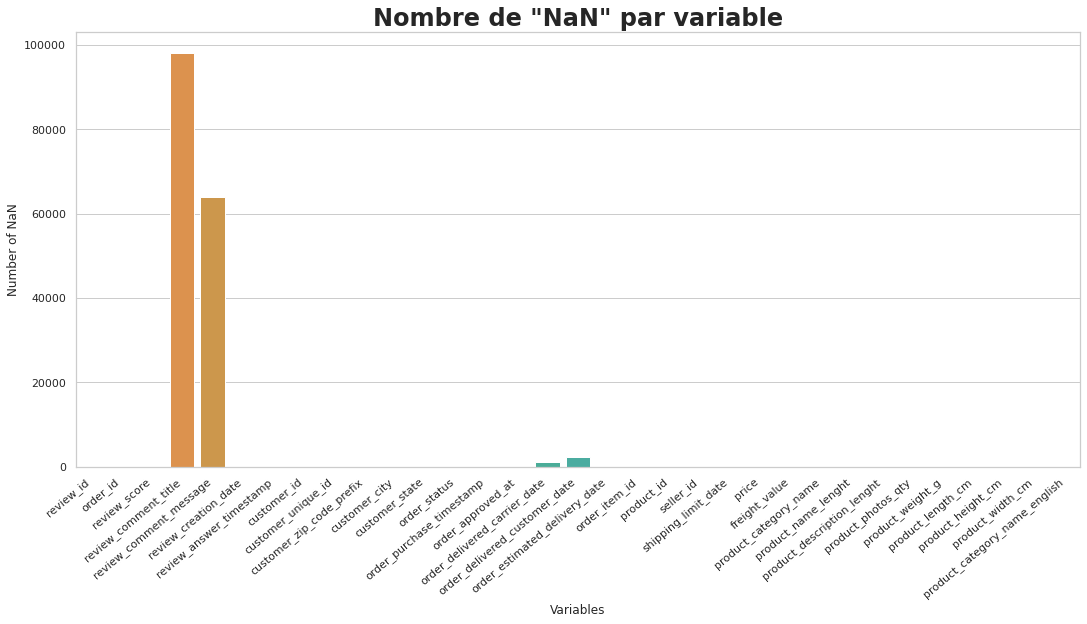

In [ ]:
plot_NaN(data_merge)

#### Détails +

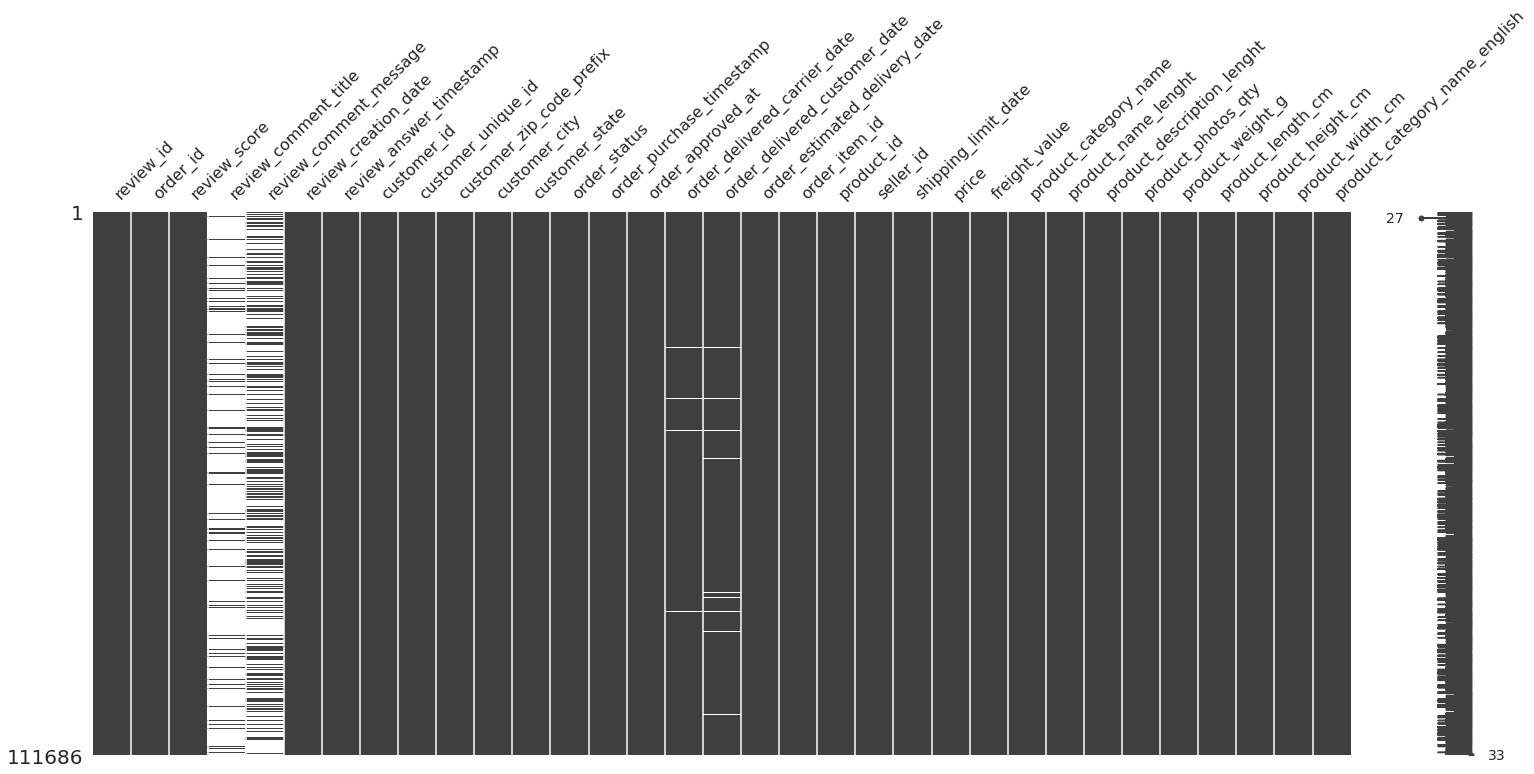

In [ ]:
msno.matrix(data_merge)

**Remarque:** 2 colonnes sont particulierement vide: "**review_comment_title**" & "**review_comment_message**".\
On n'utilisera pas ces informations pour la segmentation.

### analyse univarié

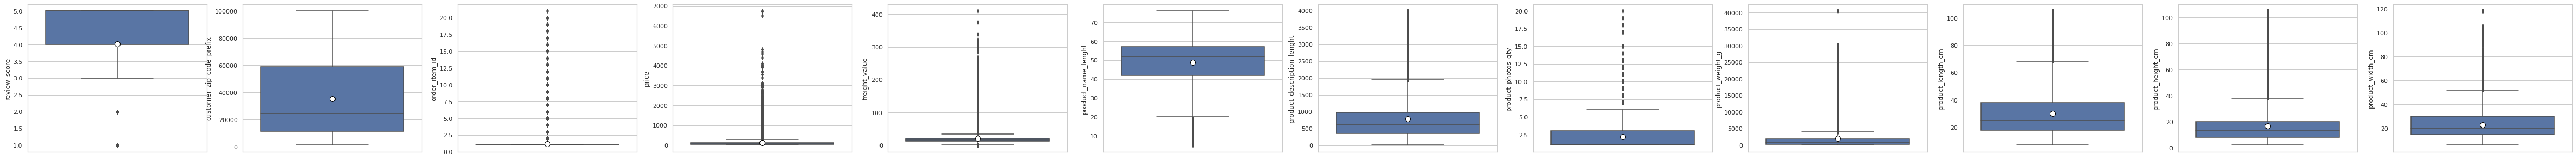

In [ ]:
cols = data_numerical.columns
fig = plt.figure(figsize=(7*len(cols), 5))
numPlot = 0
for col in cols:
  numPlot += 1
  ax = fig.add_subplot(1, len(cols), numPlot)
  ax = sns.boxplot(y=col, data=data_numerical, showmeans=True,
              meanprops={"marker":"o",
                      "markerfacecolor":"white", 
                      "markeredgecolor":"black",
                    "markersize":"10"})
plt.show()

### analyse bivarié

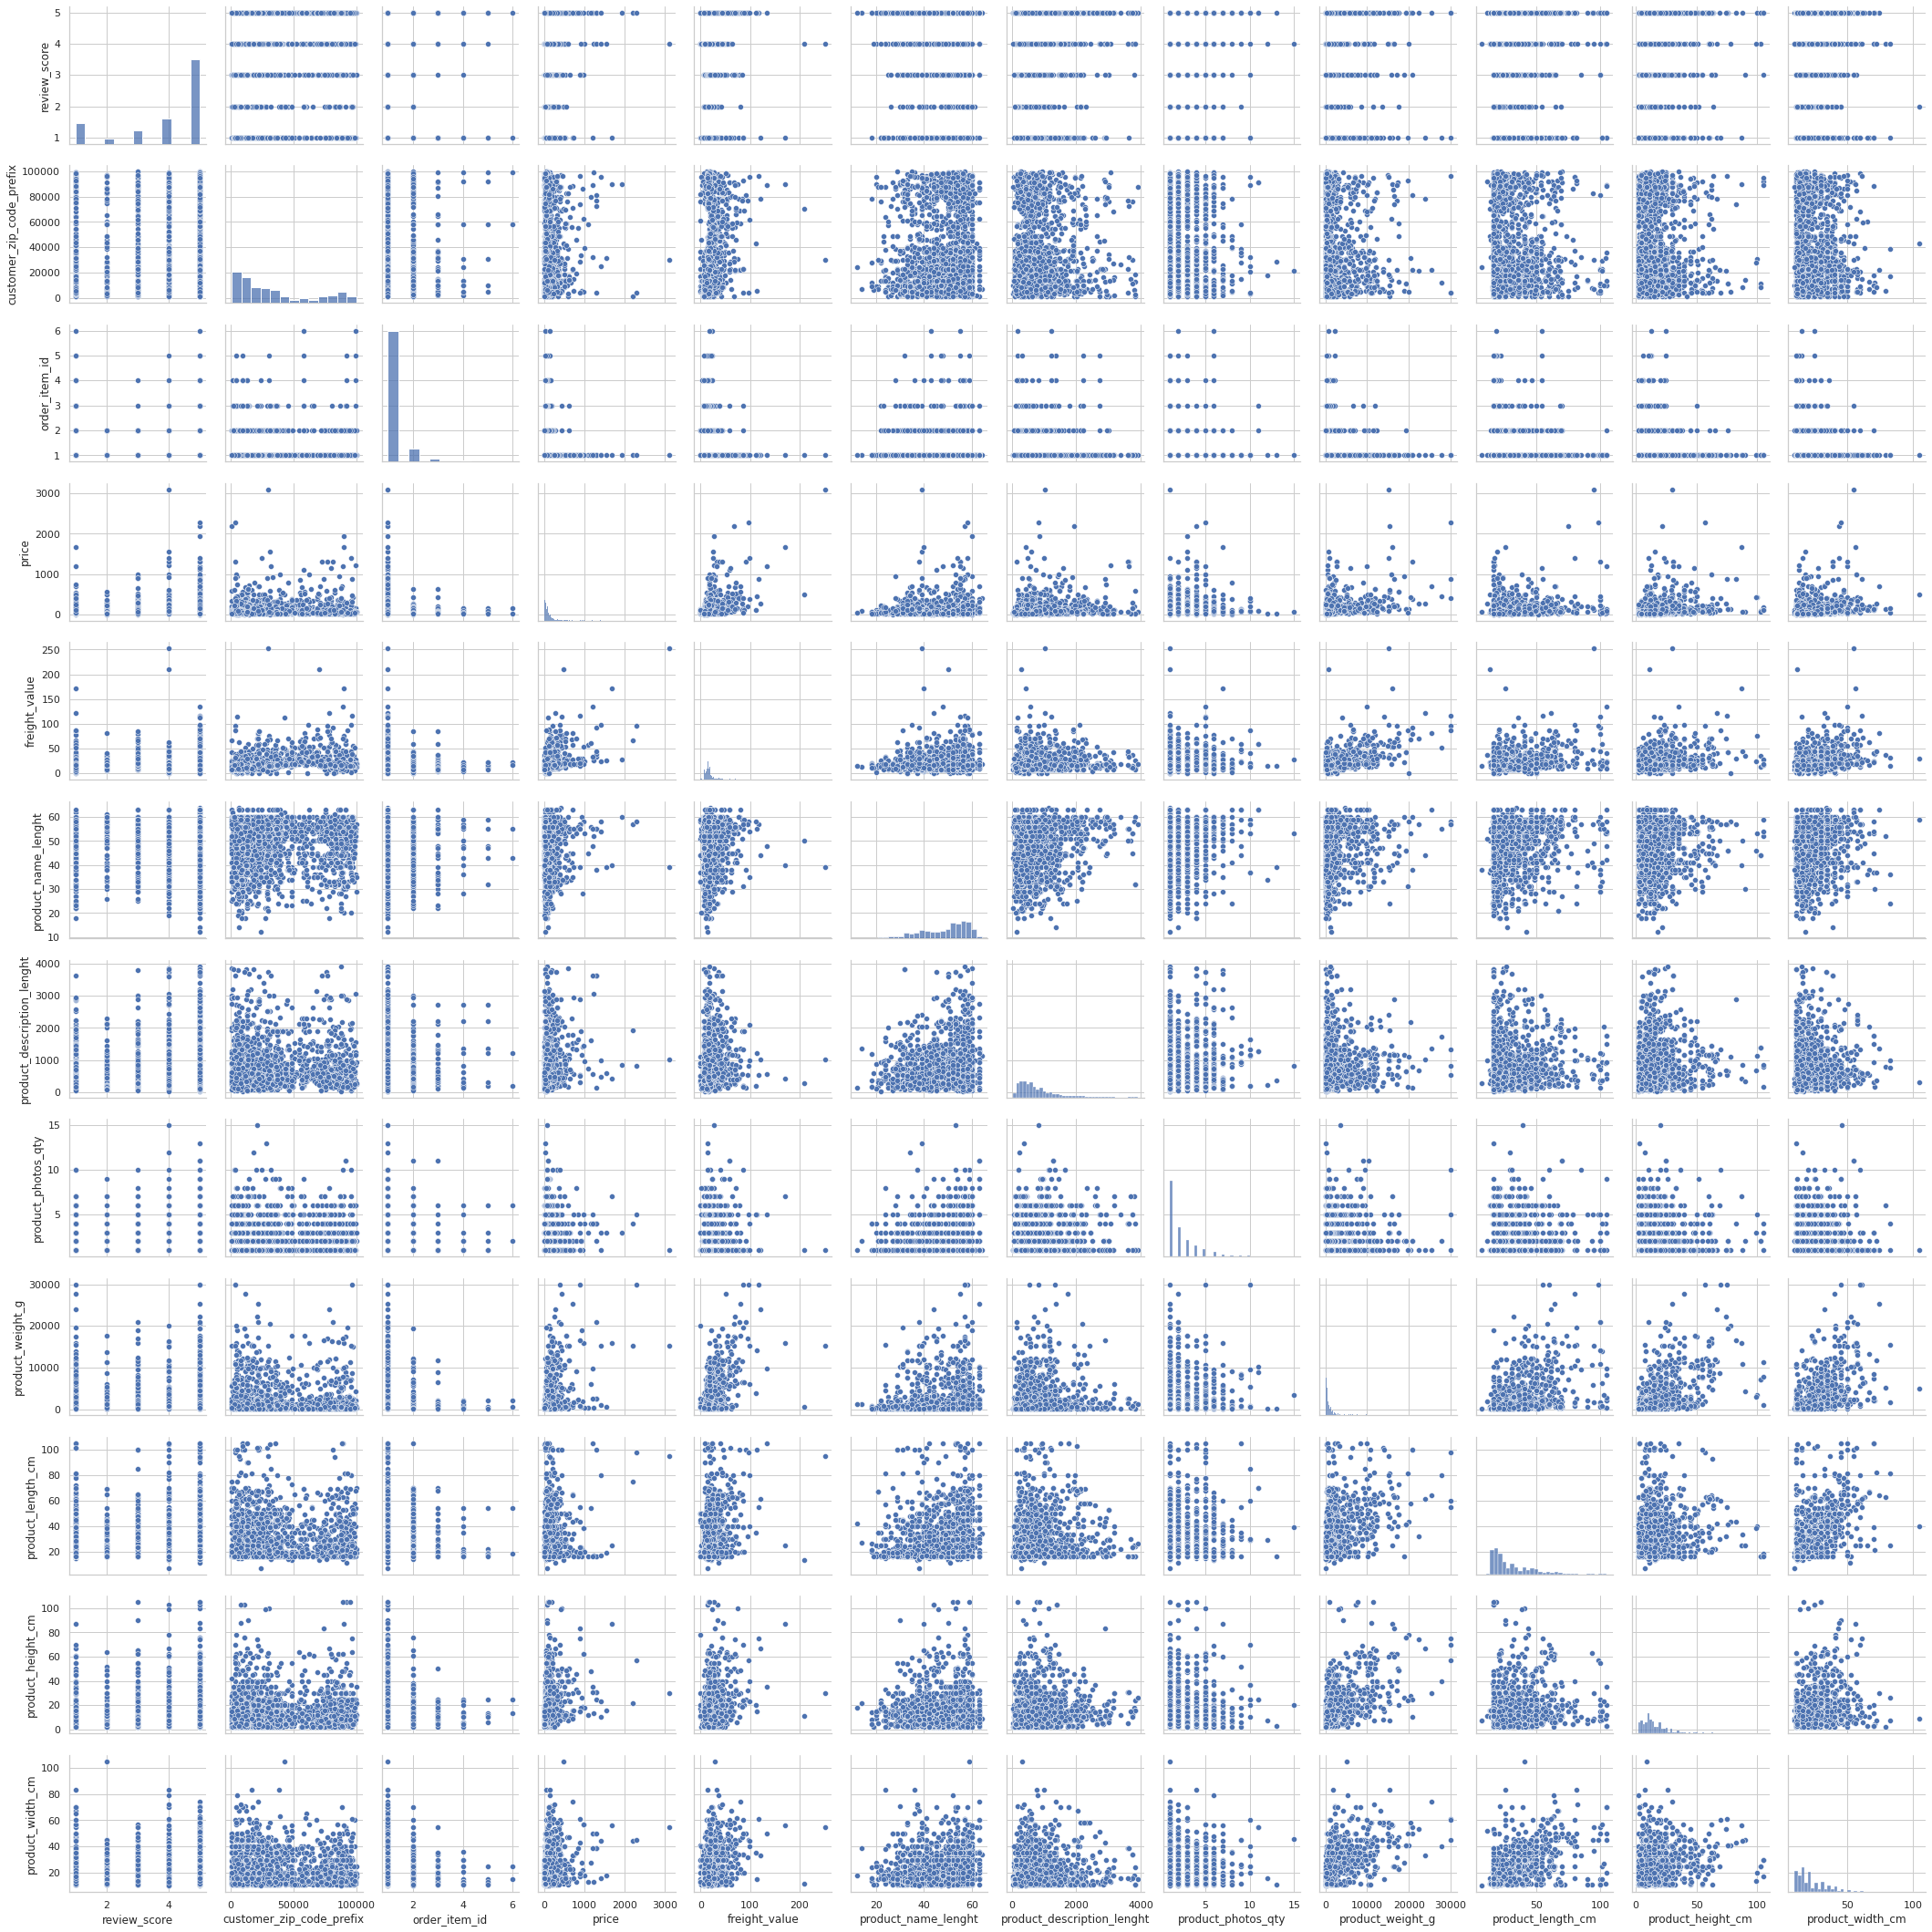

In [ ]:
sns.pairplot(data_merge[0:2000])